In [13]:
import sys
# 添加一些包的路径
packages = [
    '../dataset/',
    '../utils/',
    '../optimizer/',
    '../loss/',
    '../model/'
]
sys.path.extend(packages)
import numpy as np
import torch
from util import extract_patches
from DataUtil import kfold_list
from dataset.KumarPatchDataSet import KumarPatchDataSet
from ImageProcess.ImgShow import showLineImg
test_same_img = np.load('../dataset/kumarDataset/train/trainDataSet.npy')
test_same_label = np.load('../dataset/kumarDataset/labels/labelDataSet.npy')




In [8]:
train_idxs,val_idxs = kfold_list(16,4)
val_idxs_fold = val_idxs[0]


imgs_val = np.transpose(test_same_img[val_idxs_fold],(0,3,1,2)) # 训练的图像的数据


labels_val = np.expand_dims(test_same_label[val_idxs_fold],axis=3)
labels_val = labels_val.transpose(0,3,1,2) # 训练的标签的数据

print(imgs_val.shape,labels_val.shape)

val_dataset = KumarPatchDataSet(imgs_val,labels_val)
print(len(val_dataset))

image,label = val_dataset[0]




(4, 3, 1000, 1000) (4, 1, 1000, 1000)
144


In [21]:

image_numpy = image.numpy()
label_numpy = label.numpy()
print(image_numpy.shape,label_numpy.shape)



(3, 256, 256) (1, 256, 256)


In [22]:
image_numpy = image_numpy.transpose(1,2,0)
label_numpy = label_numpy[0]
print(image_numpy.shape, label_numpy.shape)




(256, 256, 3) (256, 256)


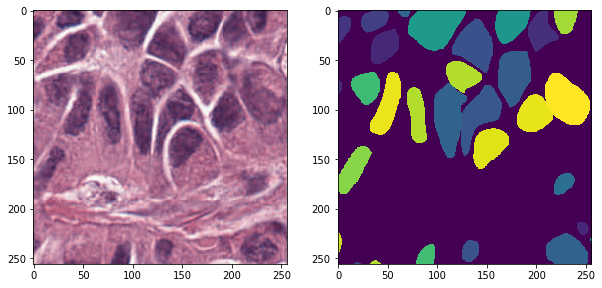

In [27]:
showLineImg([image_numpy.astype('int'), label_numpy.astype('int')])

